ENCODING OF AMINO ACID SEQUENCES OF PROTEINS INTO COMPLEX NUMBERS AND THEIR CLASSIFICATION BY COMPLEX DEEP LEARNING METHODS:

Step 1 (Data import): Raw amino acid sequences of Kinase and GPCR proteins are imported separately in fasta form using accession numbers from NCBI gene bank. Kinase and GPCR amino acid sequences are imported separately in two stages.

Step 2 (Data preprocessing): Amino acid sequences of Kinase and GPCR proteins are labelled as "1" and "0", limited to 300, randomly mixed and combined and saved as a single dataframe in fasta form.

Step 3 (Complex Coding) : The combined dataframe in categorical form is converted into complex numbers by the proposed Complex Coding Method and saved as a complex-valued dataframe.

Step 4 (Classification): Using complex-valued dataframe, Kinase and GPCR proteins are classified by Complex deep learning method.

Step 5 (Results and Graphs): Classification results measured by different metrics are visualised with Graphs.



STEP 1:DATA IMPORT

a) Amino Acid sequences of Kinase proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
# Step 1: (KİNASE A.A. Data import) #

#For the KİNASE protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77753.1",
"CAA77752.1",
"CAA42411.1",
"CAA33389.1",
"CAA42556.1",
"CAA42713.1",
"CAA44396.1",
"CAA42744.1",
"CAA38700.1",
"CAA40491.1",
"CAA43372.1",
"CAA46388.1",
"NP_001015048.1",
"CAA78813.1",
"CAA39849.1",
"CAA47001.1",
"CAA47002.1",
"CAA47004.1",
"CAA47006.1",
"CAA47008.1",
"AAH93072.1",
"AAA51548.1",
"AAA35503.1",
"AAA58363.1",
"AAA58364.1",
"AAA58391.1",
"AAB50921.1",
"AAB50922.1",
"AAA58424.1",
"NP_060260.3",
"AAH93822.1",
"AAA76851.1",
"AAA52025.1",
"AAA96609.1",
"AAA98744.1",
"AAH92416.1",
"AAC14449.1",
"AAC14450.1",
"AAC14451.1",
"AAA58459.1",
"NP_008959.3",
"NP_001015878.1",
"BAD96360.1",
"AAA59502.1",
"AAA59555.1",
"AAB59362.1",
"AAA36318.1",
"AAA36406.1",
"AAB59449.1",
"AAA36409.1",
"AAA36410.1",
"AAA36411.1",
"AAA03176.1",
"AAA18253.1",
"AAA36442.1",
"AAA60095.1",
"BAD96365.1",
"AAA60099.1",
"AAA60170.1",
"AAA03175.1",
"AAC41690.1",
"AAA60102.1",
"AAA60100.1",
"AAA60104.1",
"AAA36449.1",
"AAA36539.1",
"BAA01547.1",
"AAC82497.1",
"BAD96423.1",
"AAB26341.1",
"AAA35639.1",
"AAA58620.1",
"AAA52643.1",
"AAA52644.1",
"AAA36206.1",
"AAA59540.1",
"AAA36488.1",
"AAA36748.1",
"CAA48870.1",
"CAA41728.1",
"CAA51837.1",
"BAD96489.1",
"AAA36585.1",
"AAA36614.1",
"AAA36615.1",
"AAA52576.1",
"AAA36657.1",
"AAA60078.1",
"AAA60175.1",
"AAA18284.1",
"AAA36659.1",
"AAA18251.1",
"BAD96647.1",
"AAA03565.1",
"AAA60171.1",
"AAC50062.1",
"AAA35673.1",
"AAA16703.1",
"CAA53536.1",
"AAA18225.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx", index=False)



Below are the first five lines of the KİNAZ amino acid sequences downloaded to the file, printed with .head():

In [3]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  CAA77753.1  MVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISP...
1  CAA77752.1  MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...
2  CAA42411.1  MAEKGDCIASVYGYDLGGRFVDFQPLGFGVNGLVLSAVDSRACRKV...
3  CAA33389.1  MPFSNSHNALKLRFPAEDEFPDLSAHNNHMAKVLTPELYAELRAKS...
4  CAA42556.1  MSAIQAAWPSGTECIAKYNFHGTAEQDLPFCKGDVLTIVAVTKDPN...





b) Amino Acid sequences of GPCR proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
#2nd stage of step 1 (GPCR Data import)#

#For the GPCR protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77746.1",
"CAA40530.1",
"CAA38699.1",
"CAA39286.1",
"CAA45319.1",
"CAA33336.1",
"CAA33337.1",
"CAA77558.1",
"CAA40963.1",
"AAA35491.1",
"AAA58353.1",
"AAA58355.1",
"AAA51570.1",
"AAA51598.1",
"AAA35535.1",
"AAA62831.1",
"AAA58408.1",
"AAB05207.1",
"AAA88024.1",
"AAA52342.1",
"AAA35847.1",
"AAA52478.1",
"AAA88050.1",
"AAA58647.1",
"AAA58675.1",
"AAA36108.1",
"AAA59933.1",
"AAA36366.1",
"AAA16594.1",
"AAA60001.1",
"AAA60070.1",
"BAA01920.1",
"BAA14398.1",
"BAA01720.1",
"BAA01050.1",
"BAA01722.1",
"BAA02445.1",
"CAA43953.1",
"CAA39284.1",
"AAA35604.1",
"AAA35924.1",
"AAA16617.1",
"CAA50641.1",
"CAA68560.1",
"AAB25531.1",
"AAB26273.1",
"AAA36605.1",
"AAA58247.1",
"AAA60315.1",
"AAA60316.1",
"AAA36641.1",
"AAA36646.1",
"AAA60601.1",
"AAA03651.1",
"CAA52376.1",
"AAC37538.1",
"AAA03209.1",
"AAC52063.1",
"CAA50979.1",
"AAC13372.1",
"AAC13373.1",
"CAA54182.1",
"AAA36434.1",
"AAA60002.1",
"AAA17684.1",
"BAA05840.1",
"AAA73958.1",
"AAA74230.1",
"CAA54031.1",
"AAA19119.1",
"AAB60351.1",
"CAA84380.1",
"AAA98990.1",
"CAA46621.1",
"AAB60656.1",
"AAC09005.1",
"BAA03319.1",
"AAB29854.1",
"AAB31320.1",
"AAB59437.1",
"AAC14460.1",
"AAA64592.1",
"AAA64593.1",
"BAA04120.1",
"AAC50158.1",
"AAA63180.1",
"AAA62837.1",
"AAA63181.1",
"AAA61794.1",
"CAA58749.1",
"CAA58739.1",
"CAA58740.1",
"AAB59486.1",
"AAA62158.1",
"AAB59487.1",
"AAA98457.1",
"AAA62271.1",
"AAA63906.1",
"BAA08618.1",
"CAA57019.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx", index=False)

Below are the first five lines of the GPCR amino acid sequences downloaded to the file, printed with .head():

In [4]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  CAA77746.1  MLMASTTSAVPGHPSLPSLPSNSSQERPLDTRDPLLARAELALLSI...
1  CAA40530.1  MNSFNYTTPDYGHYDDKDTLDLNTPVDKTSNTLRVPDILALVIFAV...
2  CAA38699.1  MKSILDGLADTTFRTITTDLLYVGSNDIQYEDIKGDMASKLGYFPQ...
3  CAA39286.1  MRTLNTSAMDGTGLVVERDFSVRILTACFLSLLILSTLLGNTLVCA...
4  CAA45319.1  METNFSTPLNEYEEVSYESAGYTVLRILPLVVLGVTFVLGVLGNGL...




STEP 2 : DATA PREPROCESSING


Amino acid sequences of Kinase and GPCR proteins located in two different files are labeled "1" and "0", limited to 300, randomly mixed and combined, and saved as a single data frame in fasta form. 



In [6]:
#Amino acid fasta sequences of kinase and GPCR protein families are labelled as "1" and "0", randomly shuffled, delimited and saved as a single dataframe.

#Dataframe for Amino acid 

import pandas as pd
from sklearn.utils import shuffle

# Step 1: Load and labelling data
kinaz_df = pd.read_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx")
kinaz_df['label'] = 1

gpcr_df = pd.read_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx")
gpcr_df['label'] = 0

# Step 2: Limit protein sequences to 300 characters
kinaz_df['Sequence'] = kinaz_df['Sequence'].str[:300]
gpcr_df['Sequence'] = gpcr_df['Sequence'].str[:300]

# Step 3: Combine data and shuffle randomly
combined_df = pd.concat([kinaz_df, gpcr_df])
shuffled_df = shuffle(combined_df)

# Step 4: Save data to Excel file
shuffled_df.to_excel("D:\datasetTEZ\Kinase&GPCR_Aminoacid_Fasta(DATASET).xlsx", index=False)



The first five lines of the dataframe for the KINASE (1) and GPCR (0) amino acid sequences are as follows:

In [7]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\Kinase&GPCR_Aminoacid_Fasta(DATASET).xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence  label
0  AAA16617.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...      0
1  BAD96423.1  MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...      1
2  AAA64592.1  MEDLEETLFEEFENYSYDLDYYSLESDLEEKVQLGVVHWVSLVLYC...      0
3  AAC13372.1  MKETRGYGGDAPFCTRLNHSYTGMWAPERSAEARGNLTRPPGSGED...      0
4  AAA35503.1  MSGPVPSRARVYTDVNTHRPREYWDYESHVVEWGNQDDYQLVRKLG...      1




STEP 3: COMPLEX ENCODİNG

Amino Acid data frame in Fasta form is converted to complex numbers by the proposed Complex Coding Method and saved as a new data frame with complex value.

In [43]:
#Encodes amino acid fasta sequences into complex numbers with the proposed method:

#Proposed amino acid complex coding method:

import pandas as pd 
import cmath
import numpy as np
import random

def encode_sequence(sequence):
    valid_amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    encoded = []
    for i, aa in enumerate(sequence):
        if aa == 'X':
            aa = random.choice(valid_amino_acids)
        if aa in valid_amino_acids:
            r = i + 1  # Amplitude
            theta = cmath.pi * (valid_amino_acids.index(aa) + 1) / 10  # angle (phase)
            encoded.append(cmath.rect(r, theta))
        else:
            print(f"Warning: Invalid amino acid '{aa}' encountered in sequence. Skipping.")
    return encoded

def get_components(complex_list):
    reals = [round(cplx.real, 5) for cplx in complex_list]  # round to 5th digit after comma
    imags = [round(cplx.imag, 5) for cplx in complex_list]  # round to 5th digit after comma
    mods = [round(abs(cplx), 5) for cplx in complex_list]  # round to 5th digit after comma
    args = [round(cmath.phase(cplx), 5) for cplx in complex_list]  # round to 5th digit after comma
    
    # Returns lists for new columns
    return reals, imags, mods, args

# Read data
combined_df = pd.read_excel("D:\datasetTEZ\Kinase&GPCR_Aminoacid_Fasta(DATASET).xlsx")

# Generate a list of complex numbers
combined_df['Complex'] = combined_df['Sequence'].apply(encode_sequence)

# Calculate the components of complex numbers and add them to new columns
combined_df['Real'], combined_df['Imag'], combined_df['Mod'], combined_df['Arg'] = zip(*combined_df['Complex'].apply(get_components))

# Save data encoded in complex numbers as a new data frame:
combined_df.to_excel("D:\datasetTEZ\Kinase_GPCR_AminoAcid_Fasta_Complex_Encoded.xlsx")





The first 5 lines of the data frame, which consists of amino acids coded into complex numbers, are given below:

In [44]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\Kinase_GPCR_AminoAcid_Fasta_Complex_Encoded.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

   Unnamed: 0   Accession                                           Sequence  \
0           0  AAA16617.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...   
1           1  BAD96423.1  MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...   
2           2  AAA64592.1  MEDLEETLFEEFENYSYDLDYYSLESDLEEKVQLGVVHWVSLVLYC...   
3           3  AAC13372.1  MKETRGYGGDAPFCTRLNHSYTGMWAPERSAEARGNLTRPPGSGED...   
4           4  AAA35503.1  MSGPVPSRARVYTDVNTHRPREYWDYESHVVEWGNQDDYQLVRKLG...   

   label                                            Complex  \
0      0  [(-0.5877852522924732-0.8090169943749473j), (-...   
1      1  [(-0.5877852522924732-0.8090169943749473j), (1...   
2      0  [(-0.5877852522924732-0.8090169943749473j), (-...   
3      0  [(-0.5877852522924732-0.8090169943749473j), (-...   
4      1  [(-0.5877852522924732-0.8090169943749473j), (0...   

                                                Real  \
0  [-0.58779, -1.17557, -2.42705, -4.0, 1.54508, ...   
1  [-0.58779, 1.90211, 1.763

An example of an amino acid sequence encoded by the complex method would appear in the complex plane as follows:

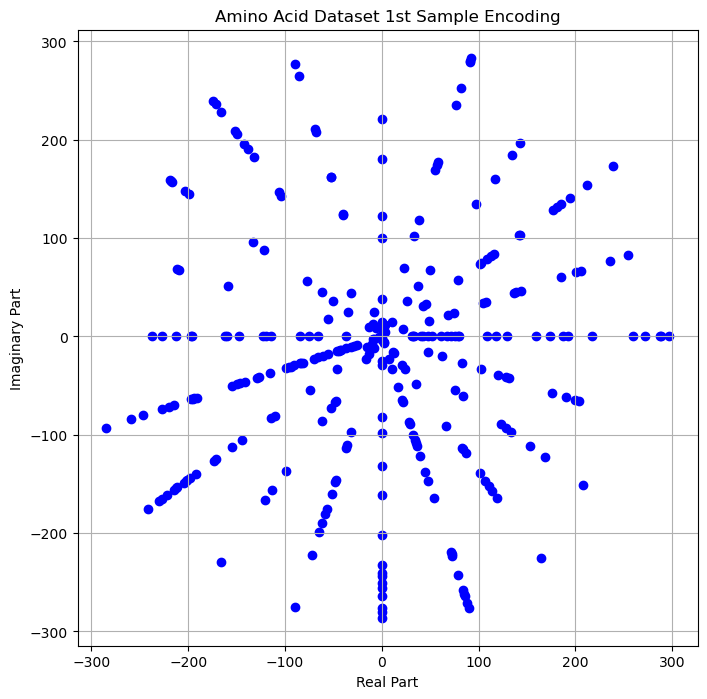

In [1]:
#Plot of the complex numbers of a coded DNA sequence on a plane
import matplotlib.pyplot as plt

# Complex numbers of a coded DNA sequence
complex_numbers = [(-0.5877852522924732-0.8090169943749473j), (0.6180339887498945-1.9021130325903073j), (-2.8531695488854614-0.9270509831248407j), (-7.347880794884119e-16-4j), (2.938926261462366+4.045084971874737j), (1.8541019662496834-5.706339097770922j), (2.1631189606246304-6.6573956140660755j), (4.898587196589413e-16+8j), (-8.559508646656385-2.781152949374522j), (-9.510565162951538-3.090169943749469j), (-6.465637775217203+8.899186938124423j), (3.7082039324993694+11.412678195541842j), (-10.517220926874316-7.641208279802149j), (-8.228993532094625-11.326237921249263j), (9.18485099360515e-16+15j), (-9.404564036679568+12.94427190999916j), (-13.753288904374104+9.992349288972045j), (10.580134541264517+14.562305898749054j), (-15.371322893124002-11.167919793556987j), (11.755705045849458-16.180339887498953j), (12.343490298141932-16.9893568818739j), (-12.931275550434412-17.798373876248842j), (21.87429987478853+7.1073908706237905j), (7.4164078649987335-22.825356391083687j), (-4.592425496802574e-15-25j), (-8.03444185374863+24.727469423673995j), (-25.678525939969152-8.343458848123566j), (-16.45798706418925-22.652475842498525j), (-5.327213576290986e-15-29j), (-28.531695488854613-9.270509831248408j), (31-7.59281015471359e-15j), (32-7.83773951454306e-15j), (33-8.082668874372531e-15j), (-32.33592155403523-10.506577808748194j), (10.815594803123153-33.28697807033038j), (21.160269082529027-29.124611797498112j), (-37+4.531193156845207e-15j), (2.326828918379971e-15+38j), (-37.091204135511-12.051662780622928j), (40-9.797174393178826e-15j), (24.09919534399139-33.16969676937285j), (42-1.0287033112837767e-14j), (-34.787730758122734+25.27476584857635j), (-41.84648671698677-13.596747752497663j), (26.45033635316129+36.405764746872634j), (-43.748599749577075-14.214781741247558j), (-44.69965626587223-14.523798735622504j), (48-1.175660927181459e-14j), (-46.601769298462536-15.141832724372398j), (47.552825814757675-15.450849718747383j), (48.50388233105283+15.759866713122317j), (52-1.2736326711132473e-14j), (42.877900701872214+31.152618371501077j), (16.68691769624715-51.3570518799383j), (-32.32818887608602+44.49593469062211j), (45.30495168499706+32.915974128378494j), (-46.11396867937201-33.503759380670964j), (-55.16127794511892-17.92298567374692j), (-56.11233446141406+18.232002668121904j), (35.26711513754837-48.54101966249685j), (61-1.494069094959771e-14j), (-50.15905365124674+36.44268564213334j), (37.03047089442581+50.96807064562169j), (-60.86761704288984-19.7770876399966j), (61.81867355918498-20.086104634371598j), (-66+8.082668874372531e-15j), (67-1.6410267108574532e-14j), (21.013155617496412-64.67184310807045j), (-65.62289962436562-21.322172611871334j), (21.631189606246306-66.57395614066075j), (71-1.7389984547892416e-14j), (68.47606917325105+22.249223594996213j), (22.558240589371163+69.4271256895462j), (-70.37818220584138-22.86725758374607j), (-75+9.184850993605149e-15j), (76-1.8614631347039768e-14j), (-62.294308566870946+45.25946442652044j), (74.18240827102197+24.103325561245896j), (79-1.9349419426528182e-14j), (80-1.9594348786357652e-14j), (-47.61060543569033-65.53037654437074j), (-1.5063155629512442e-14-82j), (-48.78617594027528-67.14841053312063j), (49.37396119256774+67.95742752749558j), (-85+1.0409497792752502e-14j), (-81.79086040138323-26.575461516245433j), (82.74191691767835-26.884478510620447j), (-83.69297343397353-27.193495504995326j), (-84.64402995026869-27.502512499370273j), (-52.900672706322595-72.81152949374525j), (28.120546488120198-86.54614298285898j), (-74.42956348249517-54.07624321090752j), (75.2385804768701-54.664028463200026j), (29.04759747124504-89.39931253174444j), (-90.35036904803961-29.356614465619955j), (-77.66563145999494+56.42738422007743j), (78.4746484543699+57.01516947236989j), (-1.8002307947466092e-14-98j), (-94.15459511322022-30.59268244311974j), (6.123233995736766e-15+100j), (-96.05670814581053-31.210716431869635j), (-31.519733426244652-97.00776466210566j), (83.32875042061957-60.54188098612475j), (-98.909877694696-32.13776741499448j), (32.44678440936946-99.86093421099113j), (-62.30523674300216-85.75580140374441j), (33.06481839811938+101.76304724358143j), (102.71410375987658-33.37383539249435j), (109-2.66973002214123e-14j), (104.61621679246689+33.991869381244214j), (34.30088637561914-105.56727330876205j), (65.83194825675696-90.60990336999413j), (107.46938634135235+34.91892036436906j), (35.227937358743986-108.42044285764752j), (-115+1.4083438190194563e-14j), (-35.845971347493915-110.32255589023781j), (36.15498834186882-111.27361240653298j), (118-2.890166445987753e-14j), (-36.77302233061876-113.17572543912327j), (-120+1.469576158976824e-14j), (-115.0778384717136-37.39105631936857j), (7.470345474798855e-15+122j), (-123+1.5063155629512445e-14j), (38.31810730249349+117.93100802059904j), (101.12712429686843+73.47315653655915j), (119.83312105318934-38.93614129124341j), (102.74515828561833+74.64872704114408j), (39.554175279993245-121.73523408577967j), (129-3.159588741800171e-14j), (-40.17220926874315+123.63734711836997j), (-40.4812262631181+124.58840363466513j), (-2.424800662311759e-14-132j), (-126.49051666725545-41.09926025186794j), (108.40827724624296+78.7632238071914j), (128.3926296998457-41.71729424061794j), (-129.34368621614092-42.026311234992775j), (-110.8353282293678-80.52657956406881j), (131.24579924873117-42.64434522374278j), (112.45336221811769+81.70215006865376j), (82.28993532094621-113.26237921249266j), (-114.07139620686759-82.87772057323869j), (83.46550582553115-114.88041320124255j), (115.68943019561749+84.05329107782366j), (136.9521383465021+44.498447189992426j), (44.80746418436735-137.90319486279728j), (138.8542513790924+45.11648117874232j), (86.40443208699352-118.92549817311729j), (-148+1.8124772627380827e-14j), (-141.70742092797792-46.043532161867084j), (-121.3525491562421+88.16778784387098j), (143.60953396056817+46.661566150617055j), (122.97058314499199-89.34335834845595j), (-47.27960013936698-145.51164699315848j), (-146.4627035094537-47.58861713374182j), (47.89763412811682-147.41376002574881j), (-48.20665112249182-148.36481654204394j), (-149.31587305833915-48.515668116866664j), (127.82468511124168-92.87006986221078j), (159-3.8943768212885834e-14j), (-160+1.9594348786357652e-14j), (-2.9575220199408576e-14-161j), (-162+1.9839278146187122e-14j), (-155.02221215611007-50.36977008311634j), (-132.67878707749136+96.39678137596562j), (133.48780407186632-96.98456662825811j), (97.57235188055054+134.29682106624128j), (-158.82643822129063+51.605838060616236j), (-51.91485505499119-159.77749473758578j), (-99.33570763742797-136.7238720493661j), (-52.53288904374105+161.67960777017612j), (-52.841906038115994+162.63066428647127j), (101.09906339430535-139.150923032491j), (53.45994002686587-164.53277731906158j), (174-4.2617708610327895e-14j), (141.5779740156158+102.8624191511828j), (142.38699100999077+103.45020440347527j), (-104.03798965576773+143.1960080043657j), (55.005024998740645+169.28805990053732j), (-144.81404199311558-105.21356016035267j), (1.1021821192326179e-14+180j), (-106.38913066493762+146.4320759818655j), (106.97691591723007-147.24109297624045j), (56.55010997061538+174.0433424820131j), (-56.85912696499035-174.99439899830824j), (175.9454555146034-57.16814395936532j), (57.477160953740224+176.89651203089855j), (187-4.580179028811101e-14j), (110.5036274309849-152.09519494249014j), (152.90421193686504-111.09141268327747j), (-58.71322893124004-180.70073809607916j), (-154.52224592561495-112.26698318786235j), (192-4.702643708725836e-14j), (-113.44255369244733-156.14027991436484j), (114.03033894473974-156.94929690873983j), (185.45602067755493+60.25831390311474j), (-196+2.4003077263288124e-14j), (-197+2.412554194320286e-14j), (116.38147995390968+160.1853648862396j), (-61.49438188061456-189.26024674273555j), (190.2113032590307-61.80339887498953j), (-191.1623597753259-62.11241586936433j), (-3.71067980141648e-14-202j), (119.320406215372-164.23044985811435j), (-194.01552932421137-63.03946685248917j), (-194.96658584050653-63.34848384686411j), (-121.08376197224949-166.65750084123914j), (-196.86869887309683-63.966517835614006j), (168.27553482998906-122.25933247683446j), (-64.58455182436404-198.77081190568708j), (199.72186842198224-64.89356881873901j), (200.6729249382774+65.2025858131139j), (-171.51160280748886-124.61047348600428j), (-213+2.6084976821838624e-14j), (203.52609448716285-66.1296367962388j), (-173.9386537906137-126.3738292428817j), (205.42820751975316+66.74767078498864j), (217-5.314967108299513e-14j), (176.36570477373854+128.13718499975914j), (-67.67472176811347+208.28137706863865j), (-209.23243358493377+67.98373876248846j), (1.3532347130578253e-14+221j), (-68.60177275123831+211.1345466175241j), (-212.08560313381923+68.9107897456133j), (181.21980673998823+131.66389651351398j), (-132.25168176580644+182.0288237343632j), (-214.93877268270475-69.837840728738j), (-227+2.7799482340644916e-14j), (134.01503752268388+184.45587471748803j), (185.26489171186296+134.60282277497635j), (71.07390870623786-218.74299874788534j), (-219.69405526418052-71.38292570061273j), (-4.261770861032789e-14-232j), (72.0009596893627-221.5961682967708j), (-72.30997668373773-222.54722481306592j), (72.6189936781126-223.4982813293611j), (-138.71731954102364+190.9280106724876j), (-237+2.902412913979227e-14j), (-192.5460446612375-139.89289004560857j), (-227.30250739454175-73.8550616556123j), (194.1640786499874+141.06846055019355j), (-4.427098178917681e-14-241j), (-142.24403105477847+195.7821126387373j), (142.83181630707097+196.59112963311222j), (-4.482207284879313e-14-244j), (-198.20916362186213-144.0073868116559j), (-199.01818061623703+144.5951720639484j), (76.32719761061202+234.91095952490292j), (235.86201604119807+76.63621460498696j), (-201.4452315993619-146.35852782082577j), (-202.25424859373686-146.94631307311826j), (-4.6107951987897846e-14-251j), (-203.87228258248672+148.12188357770327j), (-204.6812995768617-148.70966882999568j), (-149.29745408228814+205.49031657123666j), (78.79933356561155-242.51941165526418j), (-4.702643708725836e-14-256j), (207.91736755436148-151.06080983916564j), (-151.64859509145805+208.72638454873643j), (259-6.34367041958329e-14j), (-247.27469423673998-80.34441853748619j), (-211.15343553186128-153.41195084833547j), (211.96245252623623+153.99973610062796j), (-212.7714695206112-154.58752135292042j), (-4.849601324623518e-14-264j), (-214.38950350936108-155.76309185750534j), (82.19852050373602+252.98103333451084j), (253.932089850806+82.50753749811095j), (-216.8165544924859+157.52644761438282j), (-217.62557148686082+158.1142328666753j), (-218.43458848123578+158.70201811896777j), (83.74360547561069-257.73631591598667j), (272-6.662078587361601e-14j), (-259.638428948577-84.36163946436051j), (-221.6706564587356-161.05315912813762j), (84.9796734531105-261.5405419811673j), (-5.070037748470042e-14-276j), (85.59770744186038-263.44265501375753j), (-85.90672443623536+264.3937115300527j), (163.99208538959994-225.71574143061036j), (-5.143516556418883e-14-280j), (-227.33377541936022-165.16765589418492j), (-165.75544114647738+228.14279241373518j), (-166.34322639876993-228.9518094081101j), (-229.76082640248507-166.93101165106233j), (88.06984339685997-271.05110714411876j), (-5.253734768342145e-14-286j), (287-7.029472627105808e-14j), (288-7.053965563088755e-14j), (-89.30591137435985-274.8553332092994j), (89.6149283687347-275.80638972559456j), (-89.92394536310968+276.75744624188974j), (-171.63329366940212+236.23296235748467j), (90.54197935185961+278.65955927448j), (90.85099634623455+279.6106157907751j), (238.6600133406095+173.39664942627957j), (-173.98443467857203+239.46903033498444j), (297-7.274401986935278e-14j), (92.08706432373434+283.41484185595573j), (-241.89608131810928-175.74779043544945j), (-285.31695488854615-92.70509831248407j)]

real_parts = [z.real for z in complex_numbers]
imaginary_parts = [z.imag for z in complex_numbers]

# plot
plt.figure(figsize=(8, 8))
plt.scatter(real_parts, imaginary_parts, color='blue')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Amino Acid Dataset 1st Sample Encoding')
plt.grid(True)
plt.show()




STEP 4 : CLASSIFICATION OF PROTEIN (AMINO ACID) SEQUENCES USING COMPLEX VALUE DEEP LEARNING
 
Amino acid sequences of Kinase and GPCR proteins encoded in complex values are classified by Complex deep learning method.

Short Description:  Although building and training neural networks from scratch can be lengthy and difficult, the embedded modules of the Keras and Tensorflow libraries, which run in the background and are preloaded in Python, make the task easier as they can perform basic operations such as backpropagation. Since complex-valued neural networks are still an active research topic, there is still a need to define specialised classes for model development.  In this study, a special "ComplexDense" class that can perform complex operations is defined using Tensorflow and Keras libraries. The complex hyperbolic tangent (ctanh) activation function is used in the model. The complex network model consists of 5 layers: 1 input layer, 3 hidden layers and 1 output layer.  Euclidean norm is used as the error function and Wirtinger derivative is used in back propagation.  For binary classification and labelling, the Adam optimisation algorithm performed adequately. The learning rate was set to 0.005 and the model was trained for 80 epochs. How to define a loss function or its derivative that accurately reflects the nature of complex numbers is still an active research topic in the literature, and there are different views and approaches depending on the problem type. Since the Wirtinger-based error function we use performs adequately in the learning process of the model, the approach is acceptable.

In [48]:
# Complex-Valued Deep Learnig (Complex-Valued Artificial Neural Networks) 

#Classification of Kinase and GPCR proteins using amino acid sequences:

import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential

# Custom activation functions
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

class ComplexDense(Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(ComplexDense, self).__init__(**kwargs)
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.units, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        output_real = tf.matmul(inputs_real, kernel_real) - tf.matmul(inputs_imag, kernel_imag) + bias_real
        output_imag = tf.matmul(inputs_real, kernel_imag) + tf.matmul(inputs_imag, kernel_real) + bias_imag

        output = tf.complex(output_real, output_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

#Wirtinger derivative and loss function definition
def wirtinger_derivative(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true) 
    dF_dz_star = (y_pred - y_true)
    return dF_dz, dF_dz_star

def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz, dF_dz_star = wirtinger_derivative(y_true, y_pred)
    return tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2

# Load the data
data = pd.read_excel("D:\datasetTEZ\Kinase_GPCR_AminoAcid_Fasta_Complex_Encoded.xlsx")

X = np.array([np.array(list(map(float, x_real.strip("[]").split(',')))) + 1j * np.array(list(map(float, x_imag.strip("[]").split(',')))) for x_real, x_imag in zip(data['Real'], data['Imag'])])
y = data['label'].values

# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Model definition
input_layer = Input(shape=(X_train.shape[1],), dtype=tf.complex64)

complex_dense1 = ComplexDense(18, activation=complex_tanh)(input_layer)
complex_dense2 = ComplexDense(12, activation=complex_tanh)(complex_dense1)
complex_dense3 = ComplexDense(6,activation=complex_tanh)(complex_dense2)


output_layer = ComplexDense(2, activation=complex_tanh)(complex_dense3)

model = Model(inputs=input_layer, outputs=output_layer)

# Define a loss function for complex numbers
def complex_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# Compile the model with the new metric

model.compile(optimizer=Adam(learning_rate=0.003), loss=wirtinger_loss, metrics=[complex_error, 'accuracy'])

# Fit the model and evaluate as before
history = model.fit(X_train, y_train, epochs=80, batch_size=7, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/80
23/23 [==============================] - 2s 11ms/step - loss: 0.8809 - complex_error: 0.4986 - accuracy: 0.5625 - val_loss: 0.7292 - val_complex_error: 0.4909 - val_accuracy: 0.5750
Epoch 2/80
23/23 [==============================] - 0s 2ms/step - loss: 0.5859 - complex_error: 0.4782 - accuracy: 0.6375 - val_loss: 0.5306 - val_complex_error: 0.4728 - val_accuracy: 0.6500
Epoch 3/80
23/23 [==============================] - 0s 2ms/step - loss: 0.4691 - complex_error: 0.4565 - accuracy: 0.7312 - val_loss: 0.4479 - val_complex_error: 0.4424 - val_accuracy: 0.7500
Epoch 4/80
23/23 [==============================] - 0s 2ms/step - loss: 0.4035 - complex_error: 0.4024 - accuracy: 0.7750 - val_loss: 0.4251 - val_complex_error: 0.3926 - val_accuracy: 0.7000
Epoch 5/80
23/23 [==============================] - 0s 2ms/step - loss: 0.3638 - complex_error: 0.3760 - accuracy: 0.8188 - val_loss: 0.4168 - val_complex_error: 0.3837 - val_accuracy: 0.7250
Epoch 6/80
23/23 [=====================

.................................................................................................................................

STEP 5: RESULT and GRAPHS
Classification results measured by different metrics are visualised with graphs.

Short Description: 
Kinase and GPCR proteins were encoded into complex numbers using amino acid sequences and then classified by Complex Deep networks. Results were measured with Accuracy, Confusion matrix, Precision, Recall and F1 Score metrics. In general, the success values of the model are quite high and the prediction distributions are balanced between classes.
.

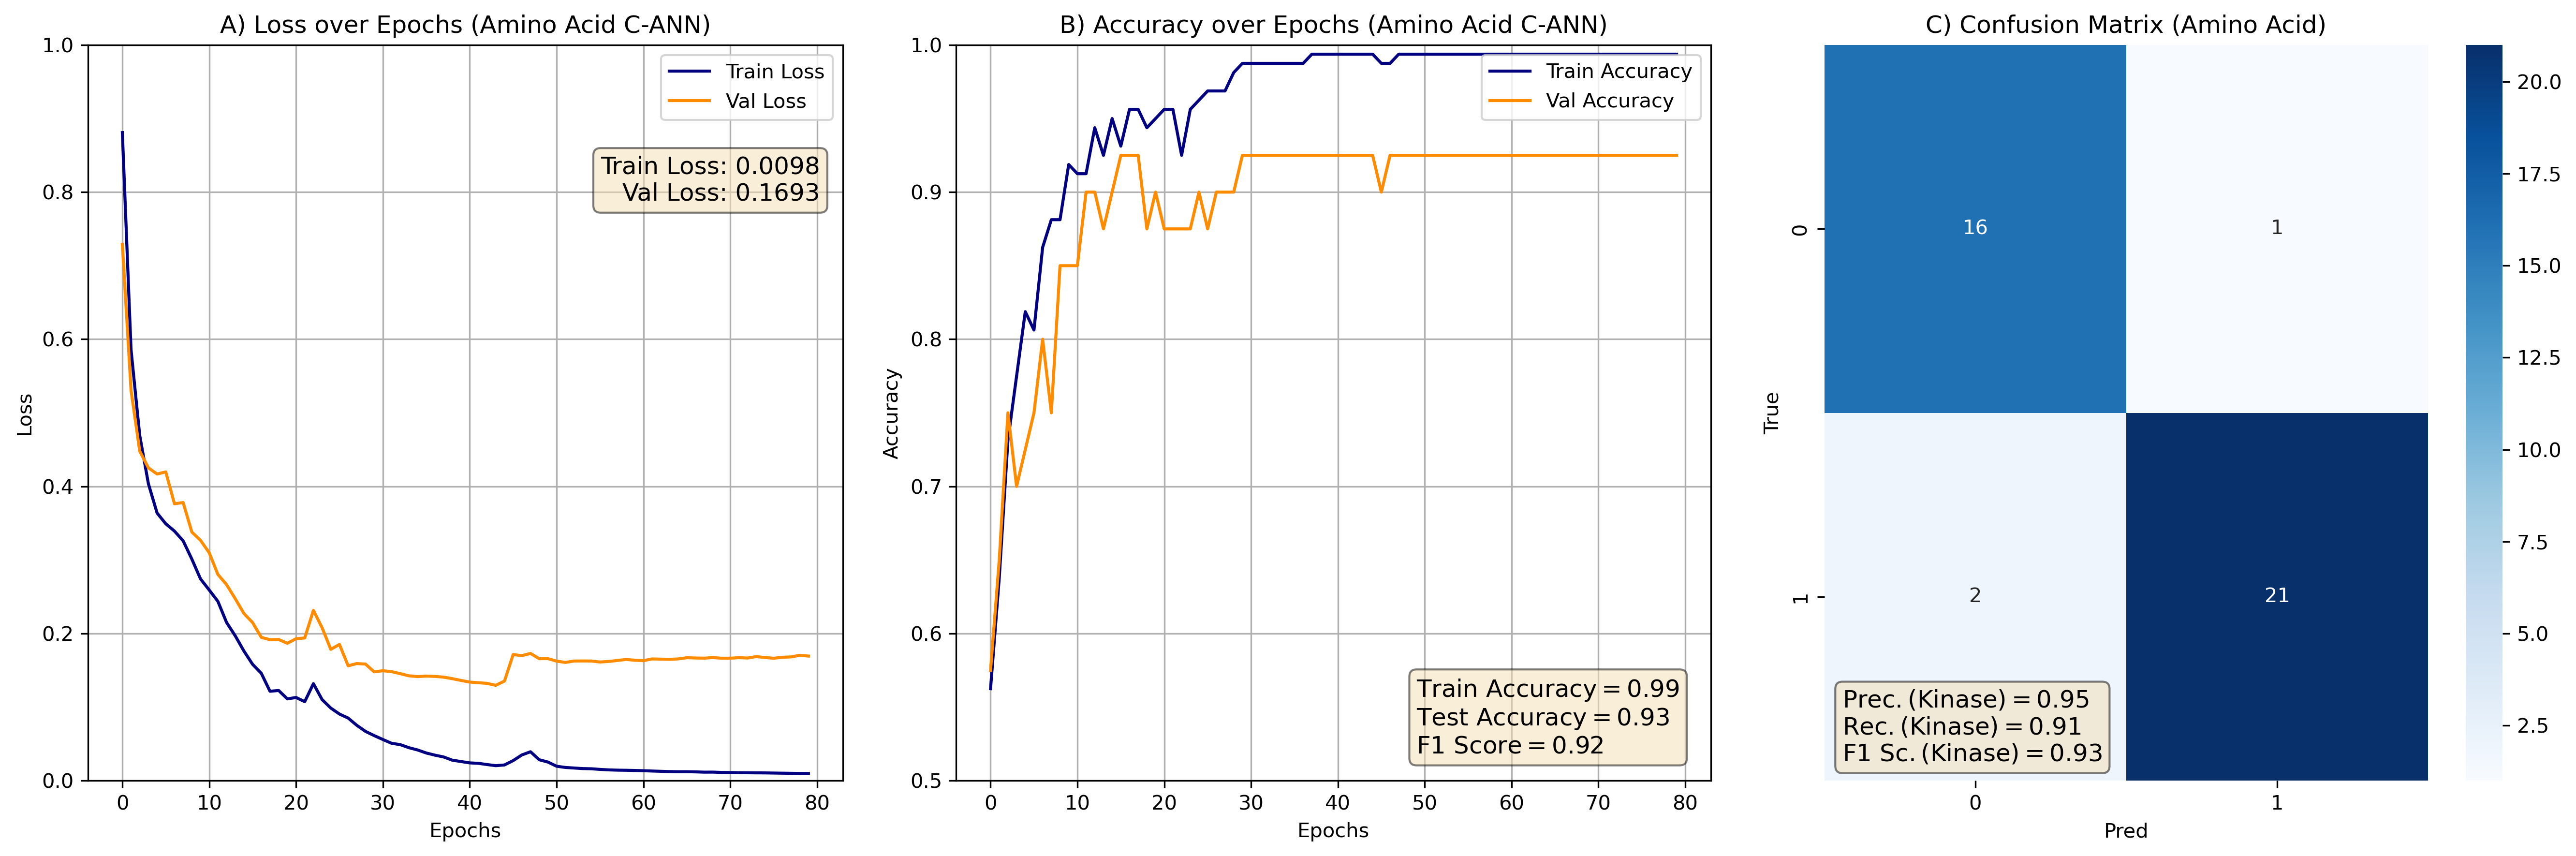

In [49]:
# Plots metric results and graphs & runs in conjunction with complex deep learning code (or it won't run)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# These codes are run together with Complex-valued deep learning codes and are defined by the model's Test results and training history
# suppose history.history['loss'], history.history['val_loss'], history.history['accuracy'] and history.history['val_accuracy'] are defined)

# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, labels=[0], average='macro')
recall_A = recall_score(y_test_classes, y_pred_classes, labels=[0], average='macro')
f1_A = f1_score(y_test_classes, y_pred_classes, labels=[0], average='macro')

precision_B = precision_score(y_test_classes, y_pred_classes, labels=[1], average='macro')
recall_B = recall_score(y_test_classes, y_pred_classes, labels=[1], average='macro')
f1_B = f1_score(y_test_classes, y_pred_classes, labels=[1], average='macro')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec. (Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (Amino Acid C-ANN)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Val Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (Amino Acid C-ANN)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.61, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (Amino Acid)')

#this part did not need to be calculated
# Place text box for class A metrics in the left of confusion matrix plot
#ax[2].text(0.03, 0.02, textstr_A, transform=ax[2].transAxes, fontsize=12,
           #verticalalignment='bottom', bbox=props) 

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.03, 0.02, textstr_B, transform=ax[2].transAxes, fontsize=12,
           verticalalignment='bottom', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()

RESULT:

Throughout the epochs for the test and training datasets of the model, it is observed that the loss values exhibit a steady decrease up to 0.16 levels, while the accuracy rate increases steadily and reaches approximately 0.93 for the test data. These observations show that the learning process of the model on the data set is successful and the generalisation capacity of the model is high. In general, the graphs of the model for training and testing are close to each other. When the confusion matrix for the test data is analysed, the predictions are balanced between GPCR and Kinase classes. In protein classification using amino acid sequences, the model is balanced in predicting both classes and has high accuracy rates.